## Notebook d’exploration: analyse univariée, multivariée, réduction dimensionnelle, régression linéaire

In [1]:
import pandas as pd
import numpy as np

open_food = pd.read_csv('open_food_fornb2.csv')

# combien de lignes et combien de colonnes?
print("Il y a:",open_food.shape[0],"lignes et", open_food.shape[1],"colonnes dans le dataframe ed_stats.")

open_food.columns


Il y a: 956486 lignes et 14 colonnes dans le dataframe ed_stats.


Index(['Unnamed: 0', 'creator', 'product_name', 'nutriscore_score',
       'nutriscore_grade', 'energy_100g_kj', 'fat_100g', 'saturated_fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'fruits_vegetables_nuts_100g'],
      dtype='object')

## Graphiques

Text(0, 0.5, 'Notes Nutriscore')

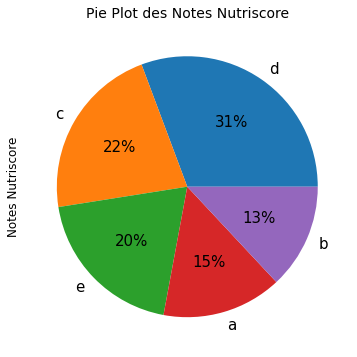

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# pie plot des classes nutriscore des produits
open_food['nutriscore_grade'].value_counts().plot.pie(figsize = (6,6), autopct = '%.f%%', fontsize = 15)
plt.title('Pie Plot des Notes Nutriscore', fontsize = 14)
plt.tick_params(labelsize = 15)
plt.ylabel('Notes Nutriscore', fontsize = 12)


Text(0.5, 0, 'Nutriscore')

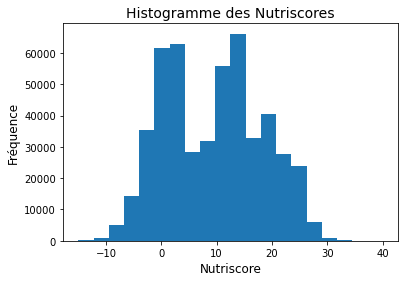

In [3]:
# quels sont les nutriscores les plus fréquents?
open_food['nutriscore_score'].plot.hist(bins = 20)
plt.title('Histogramme des Nutriscores', fontsize = 14)
plt.ylabel('Fréquence', fontsize = 12)
plt.xlabel('Nutriscore', fontsize = 12)

Text(0.5, 0, 'Nutriscore')

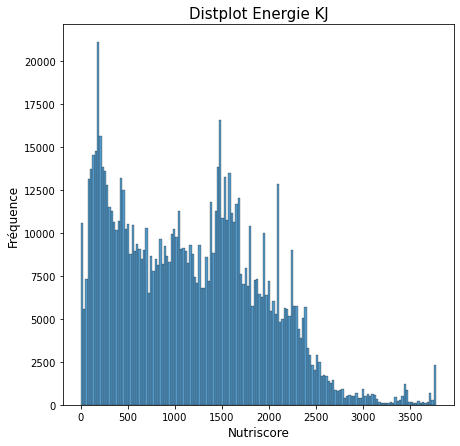

In [4]:
fig, axes = plt.subplots(figsize=[7,7]) 
sns.histplot(open_food['energy_100g_kj'])
plt.title('Distplot Energie KJ', fontsize = 15)
plt.ylabel('Fréquence', fontsize = 12)
plt.xlabel('Nutriscore', fontsize = 12)

In [5]:
# graphiques pour analyse univariée
def plot_univar(col):
    %matplotlib inline
    fig, axes = plt.subplots(figsize=[7,7]) 
    open_food[col].plot.hist(bins = 30)
    plt.title('', fontsize = 15)


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def plot_bivar(y_ax):
    
    fig, axes = plt.subplots(figsize=[10,6]) 
    
   # sns.set(style="whitegrid")
    sns_plot2 = sns.lineplot(data = open_food, x="nutriscore_score", y = y_ax, 
                            color="cornflowerblue")

    plt.xlabel('Nutriscore', fontsize = 15)
    
    for item in sns_plot2.get_xticklabels():
        item.set_rotation(75)

    sns_plot2.spines['top'].set_visible(False)
    sns_plot2.spines['right'].set_visible(False)
    sns_plot2.spines['left'].set_visible(False)
    
    # supprimer y-axis tick marks
    sns_plot2.yaxis.set_ticks_position('none')
    # rajouter major gridlines y-axis
    sns_plot2.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
    
    sns.set(font_scale= 1.4)  
    
    return sns_plot2


Text(0.5, 1.0, "Lineplot de l'énergie en KJ pour 100g, en fonction du nutriscore")

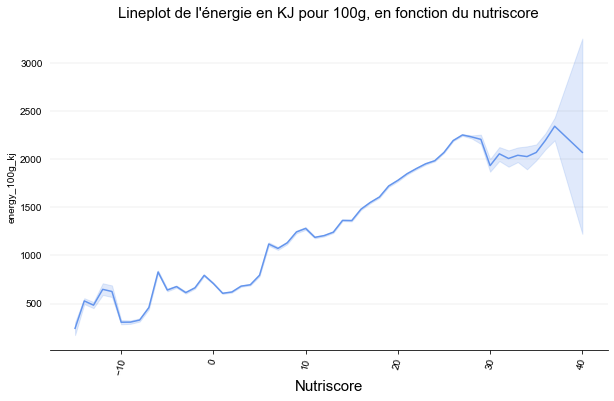

In [7]:
sns_plot3 = plot_bivar('energy_100g_kj')
sns_plot3.set_title('Lineplot de l\'énergie en KJ pour 100g, en fonction du nutriscore', fontsize = 15)

Text(0.5, 1.0, 'Lineplot du gras pour 100g, en fonction du nutriscore')

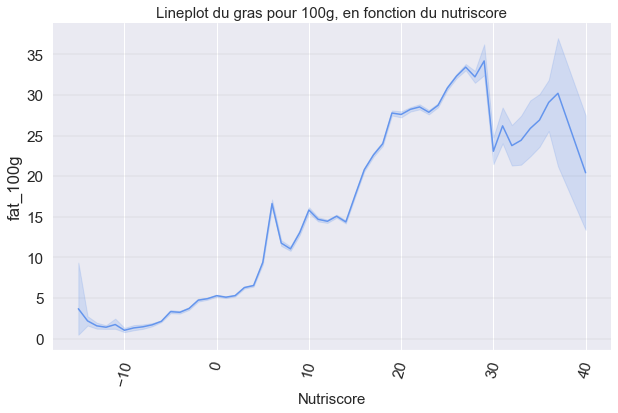

In [8]:
sns_plot3 = plot_bivar('fat_100g')
sns_plot3.set_title('Lineplot du gras pour 100g, en fonction du nutriscore', fontsize = 15)

Text(0.5, 1.0, 'Lineplot des graisses saturées pour 100g, en fonction du nutriscore')

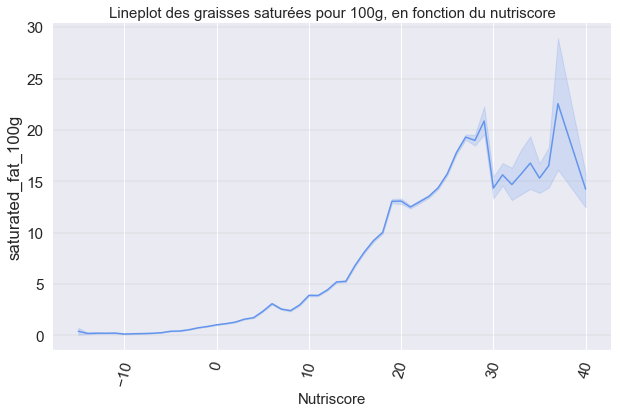

In [9]:
sns_plot3 = plot_bivar('saturated_fat_100g')
sns_plot3.set_title('Lineplot des graisses saturées pour 100g, en fonction du nutriscore', fontsize = 15)

Text(0.5, 1.0, 'Lineplot des glucides pour 100g, en fonction du nutriscore')

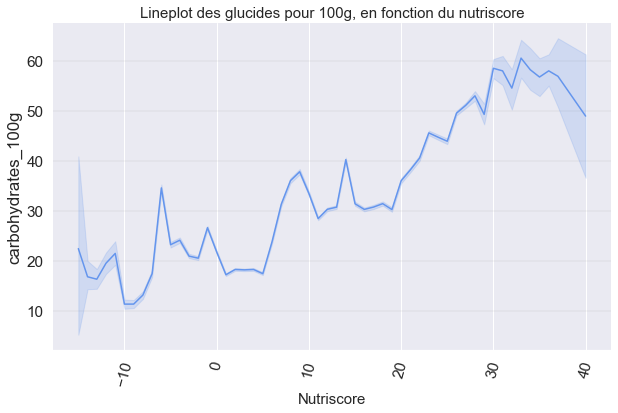

In [10]:
sns_plot3 = plot_bivar('carbohydrates_100g')
sns_plot3.set_title('Lineplot des glucides pour 100g, en fonction du nutriscore', fontsize = 15)

Text(0.5, 1.0, 'Lineplot des sucres pour 100g, en fonction du nutriscore')

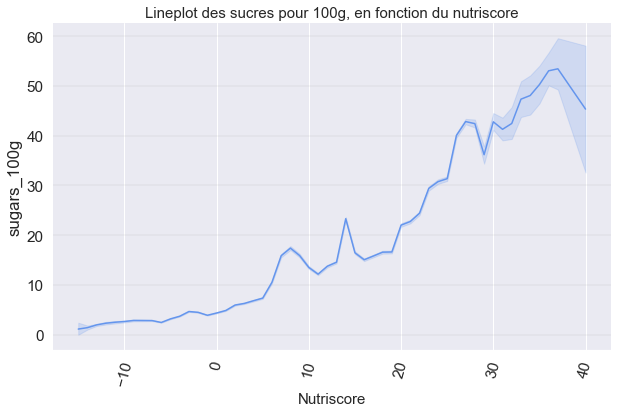

In [11]:
sns_plot3 = plot_bivar('sugars_100g')
sns_plot3.set_title('Lineplot des sucres pour 100g, en fonction du nutriscore', fontsize = 15)

Text(0.5, 1.0, 'Lineplot du sel pour 100g, en fonction du nutriscore')

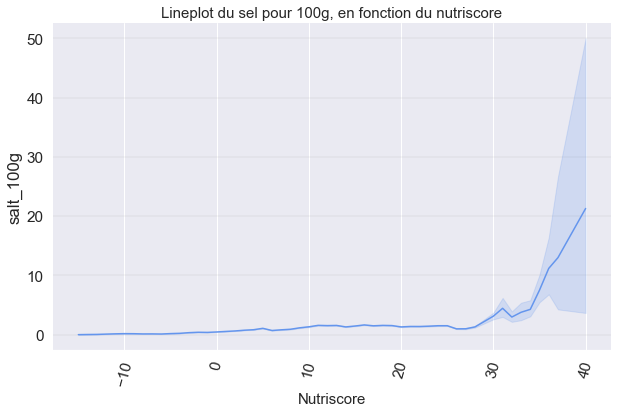

In [12]:
sns_plot3 = plot_bivar('salt_100g')
sns_plot3.set_title('Lineplot du sel pour 100g, en fonction du nutriscore', fontsize = 15)

Text(0.5, 1.0, 'Lineplot des protéines pour 100g, en fonction du nutriscore')

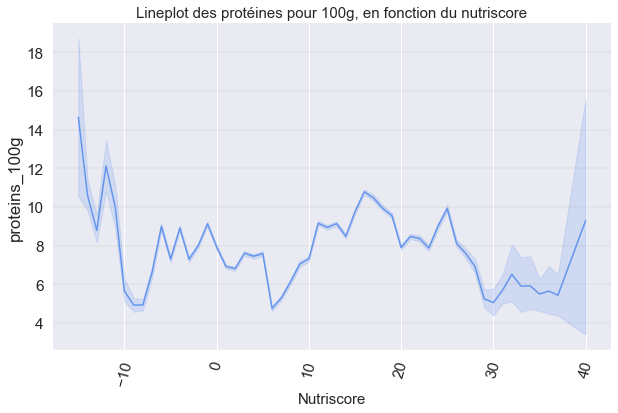

In [13]:
sns_plot3 = plot_bivar('proteins_100g')
sns_plot3.set_title('Lineplot des protéines pour 100g, en fonction du nutriscore', fontsize = 15)

Text(0.5, 1.0, 'Lineplot des fibres pour 100g, en fonction du nutriscore')

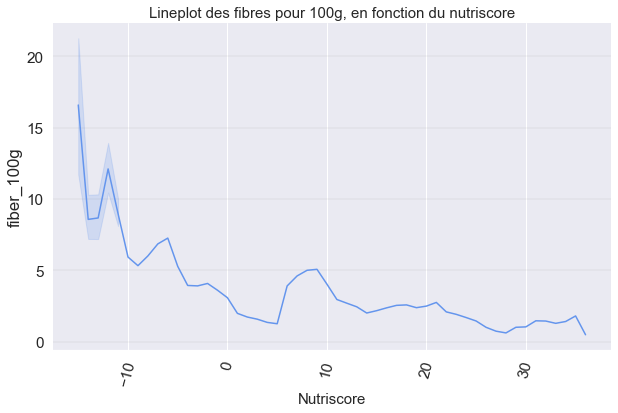

In [14]:
sns_plot3 = plot_bivar('fiber_100g')
sns_plot3.set_title('Lineplot des fibres pour 100g, en fonction du nutriscore', fontsize = 15)

Text(0.5, 1.0, 'Lineplot du pourcentage fruits et légumes, en fonction du nutriscore')

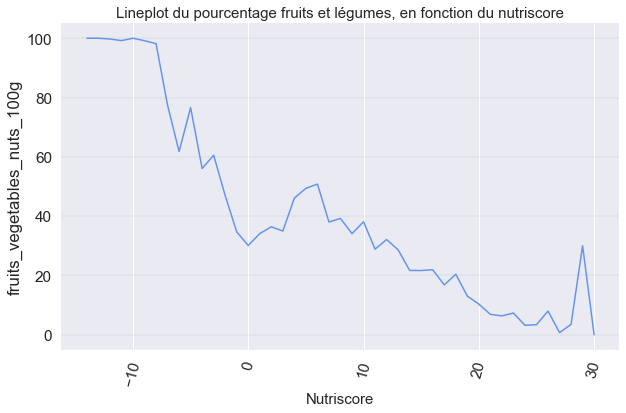

In [15]:
sns_plot3 = plot_bivar('fruits_vegetables_nuts_100g')
sns_plot3.set_title('Lineplot du pourcentage fruits et légumes, en fonction du nutriscore', fontsize = 15)

## Cercle des Corrélations

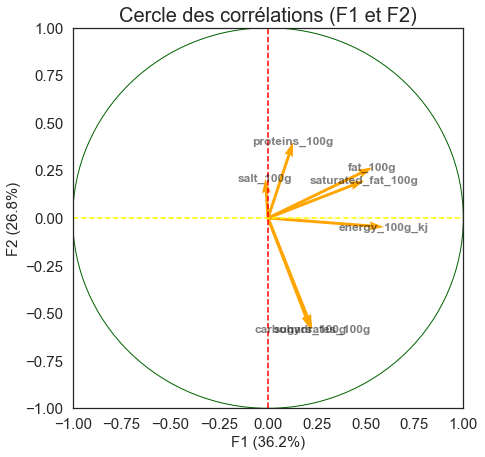

In [36]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram
            
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,7))

            sns.set(style="white")
            
            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])
            
            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                # Use quiver to generate the basic plot
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:],
                   angles='xy', scale_units='xy', scale=1, color="orange")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))

            # affichage des noms des variables # Add labels based on feature names (here just numbers)
            if labels is not None:
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='12', ha='center', va='center', 
                                 rotation=label_rotation, color="black", weight='bold', alpha=0.5)

            # affichage du cercle
            # Add unit circle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='darkgreen')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='Yellow', ls='--')
            plt.plot([0, 0], [-1, 1], color='Red', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)),fontsize=15)
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)),fontsize=15)

            plt.xticks(fontsize=15)
            plt.yticks(fontsize=15)

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1),fontsize=20)
            plt.show(block=False)
            

list = ['energy_100g_kj', 'fat_100g', 'saturated_fat_100g',
        'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g']

open_food2 = open_food[open_food['nutriscore_score'].notnull() == True]
open_food3 = open_food2[list].copy()

data = (open_food3 - open_food3.mean()) / open_food3.std()

pca = PCA().fit(data)
pcs = pca.components_
features = data.columns
display_circles(pcs, 2, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))


In [37]:
from sklearn import decomposition
from sklearn import preprocessing

pca = decomposition.PCA(n_components = 4)
pca.fit(data)
scores = pca.transform(data)
# construire un dataframe avec les variables synthétiques F1, F2
scores_df = pd.DataFrame(scores, columns=['F1', 'F2', 'F3', 'F4'])
scores_df

# rajouter au dataframe original les 2 colonnes contenant les variables synthétiques
open_food2.reset_index(inplace=True)
open_food2['F1'] = scores_df['F1']
open_food2['F2'] = scores_df['F2']
open_food2['F3'] = scores_df['F3']
open_food2['F4'] = scores_df['F4']
open_food2.columns

<ipython-input-37-f09818212dff>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_food2['F1'] = scores_df['F1']
<ipython-input-37-f09818212dff>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_food2['F2'] = scores_df['F2']
<ipython-input-37-f09818212dff>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

Index(['index', 'Unnamed: 0', 'creator', 'product_name', 'nutriscore_score',
       'nutriscore_grade', 'energy_100g_kj', 'fat_100g', 'saturated_fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'fruits_vegetables_nuts_100g', 'F1', 'F2', 'F3', 'F4'],
      dtype='object')

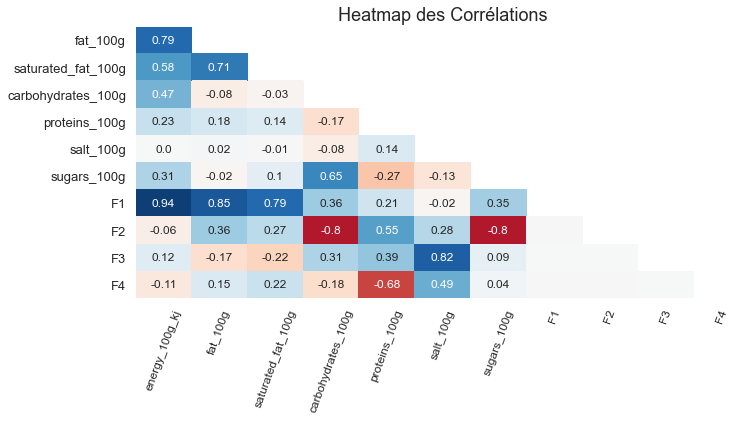

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# fonction plot_correlations()
def plot_correlations(df, name_csv):
    # créer une matrice de correlation   
    cols_with_vals = df.columns
    
    # On peut calculer la relation entre deux colonnes: la correlation, méthode dataframe.corr() 
    our_corr = df[cols_with_vals].corr()
    
    # our_corr.to_csv('{}.csv'.format(name_csv))
    our_corr = our_corr.iloc[1:]
    
    # créer un mask triangulaire pour ne pas répéter les valeurs et que le heatmap soit plus facile à lire
    # la fonction np.triu() nous donne une copie de la matrice avec les elements en dessous de la diagonale  
    mask = np.triu(np.ones_like(our_corr), k=1)
    
    # heatmap des valeurs
    plt.figure(figsize=(11,5))
    ax = sns.heatmap(our_corr, vmin=-1, vmax=1, cbar=False,
                     cmap='RdBu', mask=mask, annot=True)
    
    # formatter le texte du graphique, cacher le labels pour valeurs près de 0
    for text in ax.texts:
        t = float(text.get_text())
        if -0.005 < t < 0.001:
            text.set_text('')
        else:
            text.set_text(round(t, 2))
        #text.set_fontsize('x-large')
    plt.xticks(rotation=70, fontsize = 12)
    plt.yticks(rotation=0, fontsize = 13)
    plt.title('Heatmap des Corrélations', fontsize = 18)
    plt.show()

list = ['energy_100g_kj', 
        'fat_100g', 'saturated_fat_100g', 'carbohydrates_100g', 'proteins_100g','salt_100g',
        'sugars_100g', 'F1', 'F2','F3','F4']

plot_correlations(open_food2[list], "correlation_matrix")


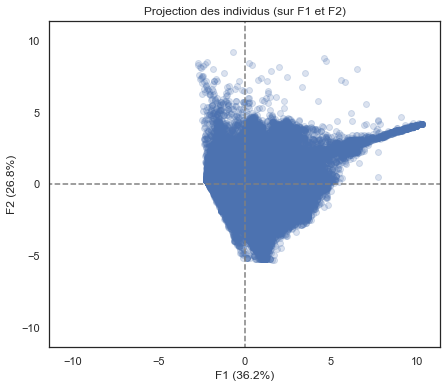

In [39]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing

def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 

            
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

X_projected = pca.transform(data)
display_factorial_planes(X_projected, 2, pca, [(0,1),(1,2),(0,2)], alpha = 0.2)

## Régression Linéaire

In [20]:
import pandas as pd
import numpy as np

# importer le jeu de données nettoyé
open_food2 = pd.read_csv('open_food_fornb2.csv')

# combien de lignes et combien de colonnes
print("Il y a:",open_food2.shape[0],"lignes et", open_food2.shape[1],"colonnes dans le dataframe ed_stats.")


Il y a: 956486 lignes et 14 colonnes dans le dataframe ed_stats.


In [21]:
def vals_manquantes(open_food):
    # nombre de valeurs manquantes pour chaque colonne 
    missing_open_food = open_food.isnull().sum()
    # pourcentage de valeurs manquantes dans open_food . 
    null_counts_pct = missing_open_food / open_food.shape[0] * 100
    # plus facile a visualiser ensemble (le nombre et le pourcentage):
    nulls_df = pd.DataFrame({'null_counts': missing_open_food, 'null_pct': null_counts_pct})
    # ranger par pourcentages
    nulls_df = nulls_df.sort_values(by = "null_pct")
    return nulls_df

nulls_df = vals_manquantes(open_food2)
# fichier csv pour inspecter
# nulls_df.to_csv('missing_1_reg_linéaire.csv') 


In [22]:
nutripeople = open_food2[open_food2['nutriscore_score'].notnull() == True]
nulls_df = vals_manquantes(nutripeople)
# fichier csv pour inspecter
# nulls_df.to_csv('missing_nutritrain.csv') 

In [23]:
# supprimer les colonnes qui ont trop de vals manquantes (fibres, fruits & légumes)
list = ['product_name', 'nutriscore_score',
       'nutriscore_grade', 'energy_100g_kj', 'saturated_fat_100g',
       'sugars_100g', 'proteins_100g',
       'salt_100g', 'carbohydrates_100g', 'fat_100g']
open_food3 = open_food2[list].copy()

open_food3.columns


Index(['product_name', 'nutriscore_score', 'nutriscore_grade',
       'energy_100g_kj', 'saturated_fat_100g', 'sugars_100g', 'proteins_100g',
       'salt_100g', 'carbohydrates_100g', 'fat_100g'],
      dtype='object')

In [24]:
# séparer le jeu de données en 2: un dataframe pour les individus ayant un nutriscore et un pour ceux dont le 
# nutriscore est manquant
nutritrain = open_food3[open_food3['nutriscore_score'].notnull() == True]
print("Il y a:",nutritrain.shape[0],"lignes et", nutritrain.shape[1],"colonnes dans le dataframe ed_stats.")

nutripred = open_food3[open_food3['nutriscore_score'].isnull() == True]
print("Il y a:",nutripred.shape[0],"lignes et", nutripred.shape[1],"colonnes dans le dataframe ed_stats.")

len(nutritrain) * 0.75

Il y a: 493872 lignes et 10 colonnes dans le dataframe ed_stats.
Il y a: 462614 lignes et 10 colonnes dans le dataframe ed_stats.


370404.0

In [25]:
from sklearn import decomposition
from sklearn import preprocessing

list = ['energy_100g_kj', 'saturated_fat_100g', 'sugars_100g', 'carbohydrates_100g', 
        'fat_100g', 'proteins_100g', 'salt_100g']

data = (nutritrain[list] - nutritrain[list].mean()) / nutritrain[list].std()

pca = decomposition.PCA(n_components = 4)
pca.fit(data)
scores = pca.transform(data)

# créer un dataframe avec les variables synthétiques F1 et F2
scores_df = pd.DataFrame(scores, columns=['F1', 'F2', 'F3', 'F4'])

# rajouter les variables synthétiques au dataframe original
nutritrain.reset_index(inplace=True)
nutritrain['F1'] = scores_df['F1']
nutritrain['F2'] = scores_df['F2']
nutritrain['F3'] = scores_df['F3']
nutritrain['F4'] = scores_df['F4']

# Use the numpy.random.permutation() function to shuffle the ordering of the rows in dc_listings.
shuffled_index = np.random.permutation(nutritrain.index)
nutritrain = nutritrain.reindex(shuffled_index)

# Select the first 1862 rows and assign to split_one.
train = nutritrain.iloc[0:370000].copy()
test = nutritrain.iloc[370000:].copy()


<ipython-input-25-9f434d9335b4>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nutritrain['F1'] = scores_df['F1']
<ipython-input-25-9f434d9335b4>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nutritrain['F2'] = scores_df['F2']
<ipython-input-25-9f434d9335b4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [26]:
nulls_df = vals_manquantes(nutritrain)
# fichier csv pour inspecter
nulls_df.to_csv('missing_nutritrain.csv') 

In [27]:
# fonction regression linéaire 
def predire(train, test, cols):
    
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error
    %matplotlib inline
    
    lr = LinearRegression()

    model = lr.fit(train[cols], train['nutriscore_score'])
    
    # prédire les nutriscores sur le dataframe test
    test_predictions = lr.predict(test[cols])
    
    # rajouter les prédictions au dataframe
    tests_pred = pd.Series(test_predictions)
    test2 = test.reset_index()
    test2['nutriscores_pred'] = tests_pred
    
    test2.nutriscores_pred[test2['nutriscores_pred'] > 40] = 40
    test2.nutriscores_pred[test2['nutriscores_pred'] < -15] = -15
    
    iteration_one_rmse = mean_squared_error(test2["nutriscore_score"], test2['nutriscores_pred'])**(1/2)

    test2.sort_values(by = 'nutriscore_score', ascending=False).to_csv('test_my_predictions.csv')
    
    return test2, iteration_one_rmse

In [28]:
cols = ['energy_100g_kj', 'saturated_fat_100g', 'sugars_100g', 'proteins_100g',
            'salt_100g', 'carbohydrates_100g', 'fat_100g']
    
cols2 = ['F1', 'F2', 'F3', 'F4']

df, iteration_one_rmse = predire(train, test, cols)
print(iteration_one_rmse) 

df2, iteration_two_rmse = predire(train, test, cols2)
print(iteration_two_rmse) 


<ipython-input-27-d66cb1c43157>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2.nutriscores_pred[test2['nutriscores_pred'] > 40] = 40
<ipython-input-27-d66cb1c43157>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2.nutriscores_pred[test2['nutriscores_pred'] < -15] = -15


5.542030379951062


<ipython-input-27-d66cb1c43157>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2.nutriscores_pred[test2['nutriscores_pred'] > 40] = 40
<ipython-input-27-d66cb1c43157>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2.nutriscores_pred[test2['nutriscores_pred'] < -15] = -15


6.053214263227616


Text(0.5, 0, 'Nutriscore')

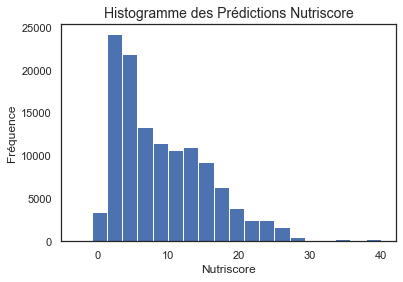

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df['nutriscores_pred'].plot.hist(bins = 20)
sns.set_style("white")
plt.title('Histogramme des Prédictions Nutriscore', fontsize = 14)
plt.ylabel('Fréquence', fontsize = 12)
plt.xlabel('Nutriscore', fontsize = 12)

Text(0.5, 0, 'Nutriscore')

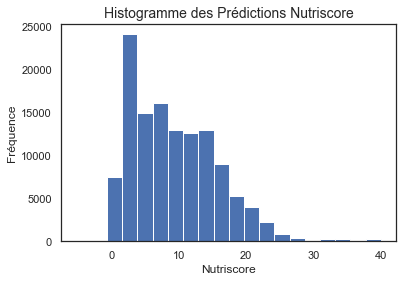

In [30]:
df2['nutriscores_pred'].plot.hist(bins = 20)
sns.set_style("white")
plt.title('Histogramme des Prédictions Nutriscore', fontsize = 14)
plt.ylabel('Fréquence', fontsize = 12)
plt.xlabel('Nutriscore', fontsize = 12)

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

cols = ['energy_100g_kj', 'saturated_fat_100g', 'sugars_100g', 'proteins_100g',
       'salt_100g', 'carbohydrates_100g', 'fat_100g']

cols2 = ['F1', 'F2', 'F3', 'F4'] 

X = test[cols]
y = test['nutriscore_score'] 

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:       nutriscore_score   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                 2.555e+04
Date:                Fri, 15 Jan 2021   Prob (F-statistic):               0.00
Time:                        09:53:45   Log-Likelihood:            -3.9062e+05
No. Observations:              123872   AIC:                         7.813e+05
Df Residuals:                  123864   BIC:                         7.813e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4716      0

In [32]:
X = test[cols2]
y = test['nutriscore_score'] 

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:       nutriscore_score   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                 3.390e+04
Date:                Fri, 15 Jan 2021   Prob (F-statistic):               0.00
Time:                        09:53:45   Log-Likelihood:            -4.0017e+05
No. Observations:              123872   AIC:                         8.004e+05
Df Residuals:                  123867   BIC:                         8.004e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3133      0.017    535.566      0.0